In [553]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [554]:
data=pd.read_csv("Data/Indian Liver Patient Dataset (ILPD).csv", names=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase",
"Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_Globulin_Ratio","Target"]
)

In [555]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### our goal is to create a model on this liver patient dataset to predict liver disease

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [399]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

In [400]:
# Albumin_Globulin_Ratio has 4 null values

In [401]:
duplicate =data[data.duplicated()==True]
duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [402]:
data.duplicated().sum()

13

In [ ]:
# these may not be real duplicates. since this is a meduical dataset may be two different patients of same age can have same values for these features.

In [403]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [404]:
data.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


The liver patient dataset has no null values except in the feature Albumin_Globulin_Ratio, which contains 4 null values.


There are more male patients than female patients in the dataset; out of 583 patients, 441 are mal
.
The features Alkaline_Phosphotase, Alamine_Aminotransferase, and Aspartate_Aminotransferase exhibit extreme values compared to the mea
n. While this is not uncommon in medical datasets, we are uncertain whether to remove, replace, or make any predictions regarding these valus.
In the Target variable, the median is 1, indicating that more patients are diagnosed with liver disease

## EDA

In [405]:
# univariate analysis

<Axes: xlabel='Gender', ylabel='count'>

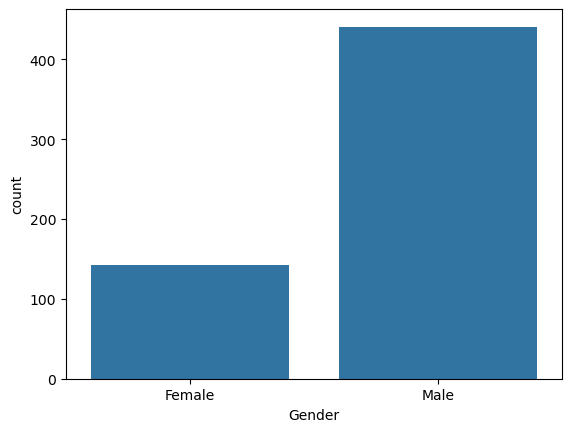

In [406]:
sns.countplot(x='Gender', data=data)

<Axes: xlabel='Target', ylabel='count'>

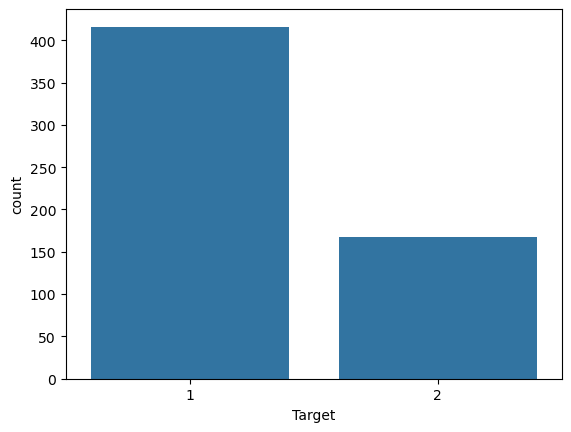

In [407]:
sns.countplot(x='Target',data=data)

In [408]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_Globulin_Ratio', 'Target'],
      dtype='object')

In [409]:
columns = data.columns.tolist()
columns.remove('Target')
print(columns)

['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_Globulin_Ratio']


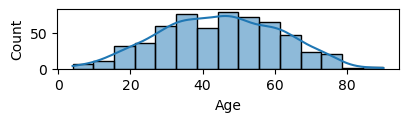

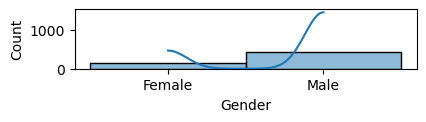

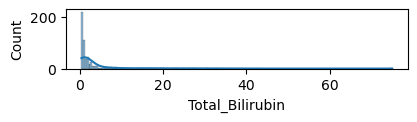

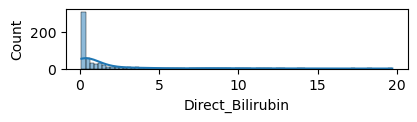

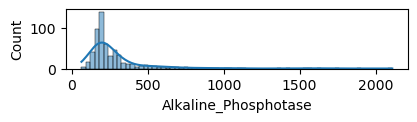

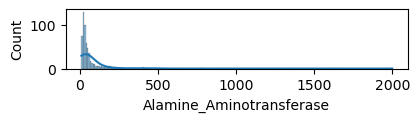

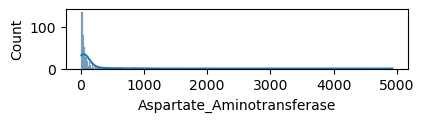

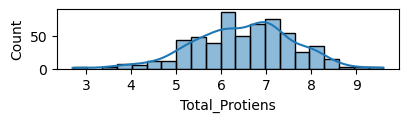

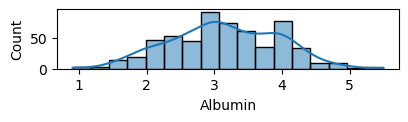

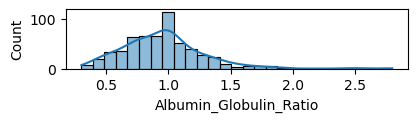

In [410]:
plotnum=1
for i in columns:
    plt.figure(figsize=(15,10))

    plt.subplot(11,3, plotnum)
    sns.histplot(x=data[i], kde=True)
    plotnum+=1

In [411]:
# above distributions are all skewed. there are chances that there might be outliers
# Age distribution seems to have like the bell shaped curve. but it is not  a normal distribution

<Axes: xlabel='Target', ylabel='Albumin'>

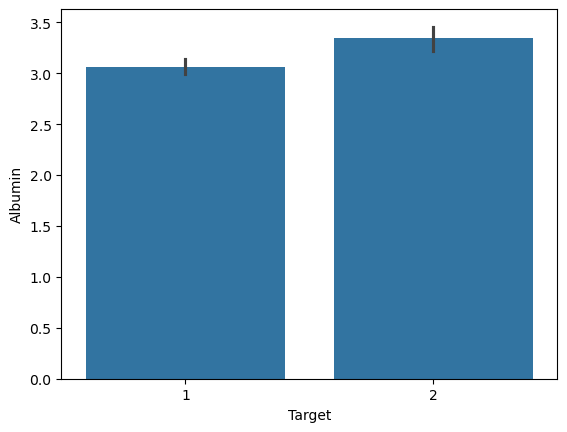

In [412]:
sns.barplot(x='Target',y='Albumin', data=data)

In [413]:
# cant see much variation in Albumin for liver patient compared to one who has no liver disease

<Axes: xlabel='Alamine_Aminotransferase', ylabel='Aspartate_Aminotransferase'>

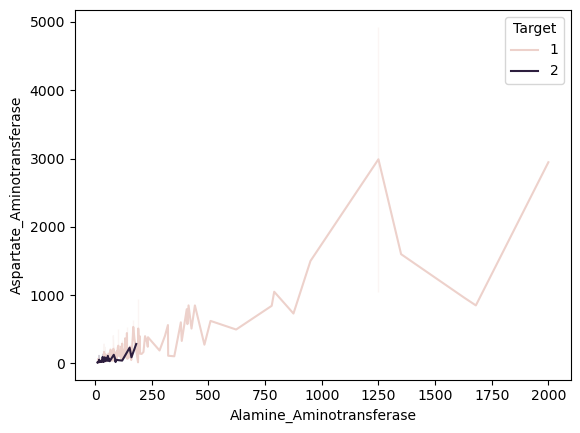

In [414]:
sns.lineplot(x='Alamine_Aminotransferase', y='Aspartate_Aminotransferase', data=data, hue='Target')

In [415]:
#compared to those who have no liver disease , the liver patients has high 'Alamine_Aminotransferase' and 'Aspartate_Aminotransferase'

<Axes: xlabel='Albumin', ylabel='Albumin_Globulin_Ratio'>

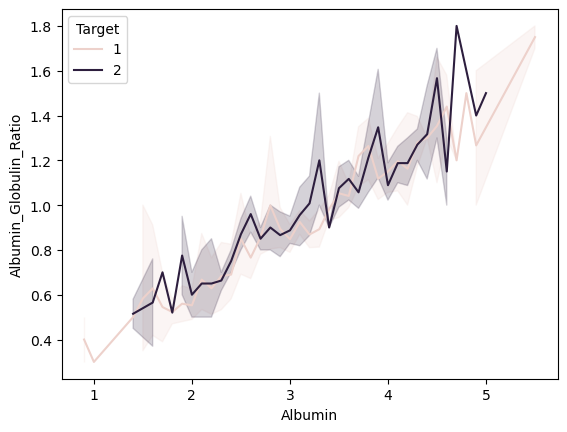

In [416]:
sns.lineplot(x='Albumin',y='Albumin_Globulin_Ratio', hue='Target',data=data)

In [417]:
# in the above plot we can see that as Albumin increases, the Albumin_Globulin_Ratio also increases for both Target groups.

<Axes: xlabel='Target', ylabel='count'>

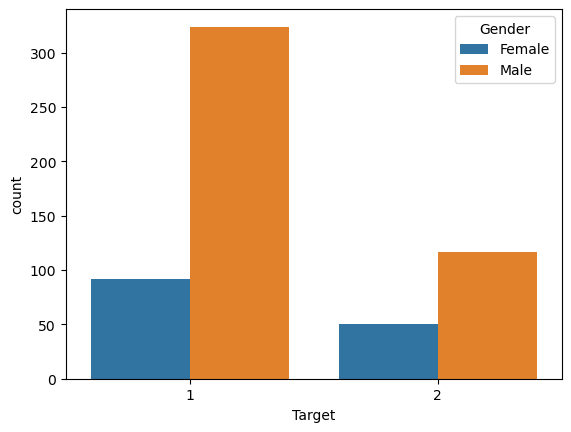

In [418]:
sns.countplot(x='Target', hue='Gender',data=data)

In [419]:
#here 1 represent patents with liver disease and 2 represent patient with no liver disease. seems like more no. of male have liver disease compared to Female.

In [420]:
data[["Target","Age","Gender"]].groupby(["Target","Gender"]).mean() # gives mean Age of patients

Age
Target Gender           
1      Female  43.347826
       Male    46.950617
2      Female  42.740000
       Male    40.598291

In [421]:
liverpat=data[data['Target'] == 1]['Age'].sort_values()
liverpat

199     7
213     8
537    10
407    12
334    13
       ..
337    75
339    75
180    75
397    78
571    90
Name: Age, Length: 416, dtype: int64

In [422]:
# 7 yr old is the youngest patient who has liver disease

<Axes: xlabel='Total_Protiens', ylabel='Count'>

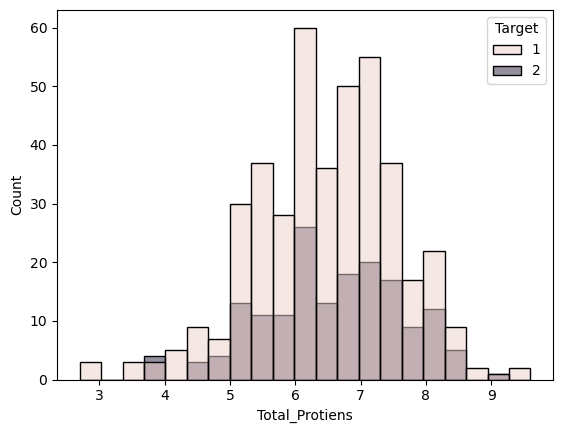

In [423]:
sns.histplot(x='Total_Protiens',hue="Target", data=data)

In [424]:
# Total protein levels are higher for those who have liver disease compared to those who do not.

<Axes: xlabel='Age', ylabel='Count'>

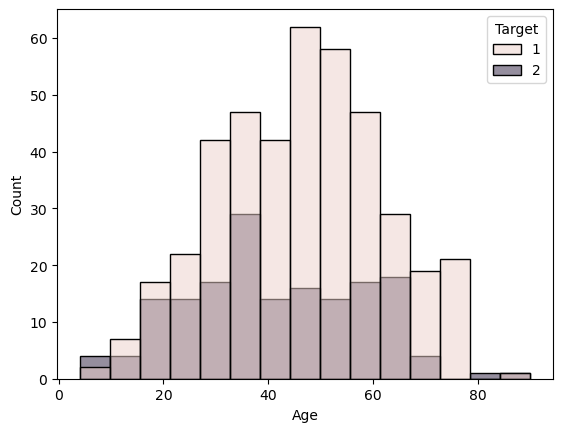

In [425]:
sns.histplot(x="Age", data=data, hue='Target')

In [426]:
# A large number of people with liver disease are between the ages of 30 and 60.

<Axes: xlabel='Target', ylabel='Age'>

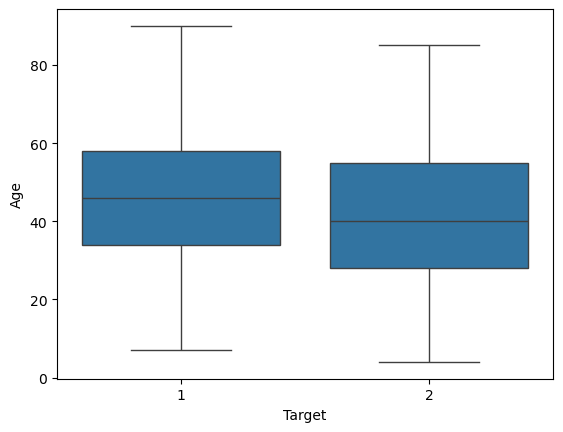

In [427]:
sns.boxplot(x='Target', y='Age', data=data)

In [428]:
# in the above boxplot the median age for Target 1 is around 50s and Target 2 is around 40. The middle 50% of data is more in Target 2.

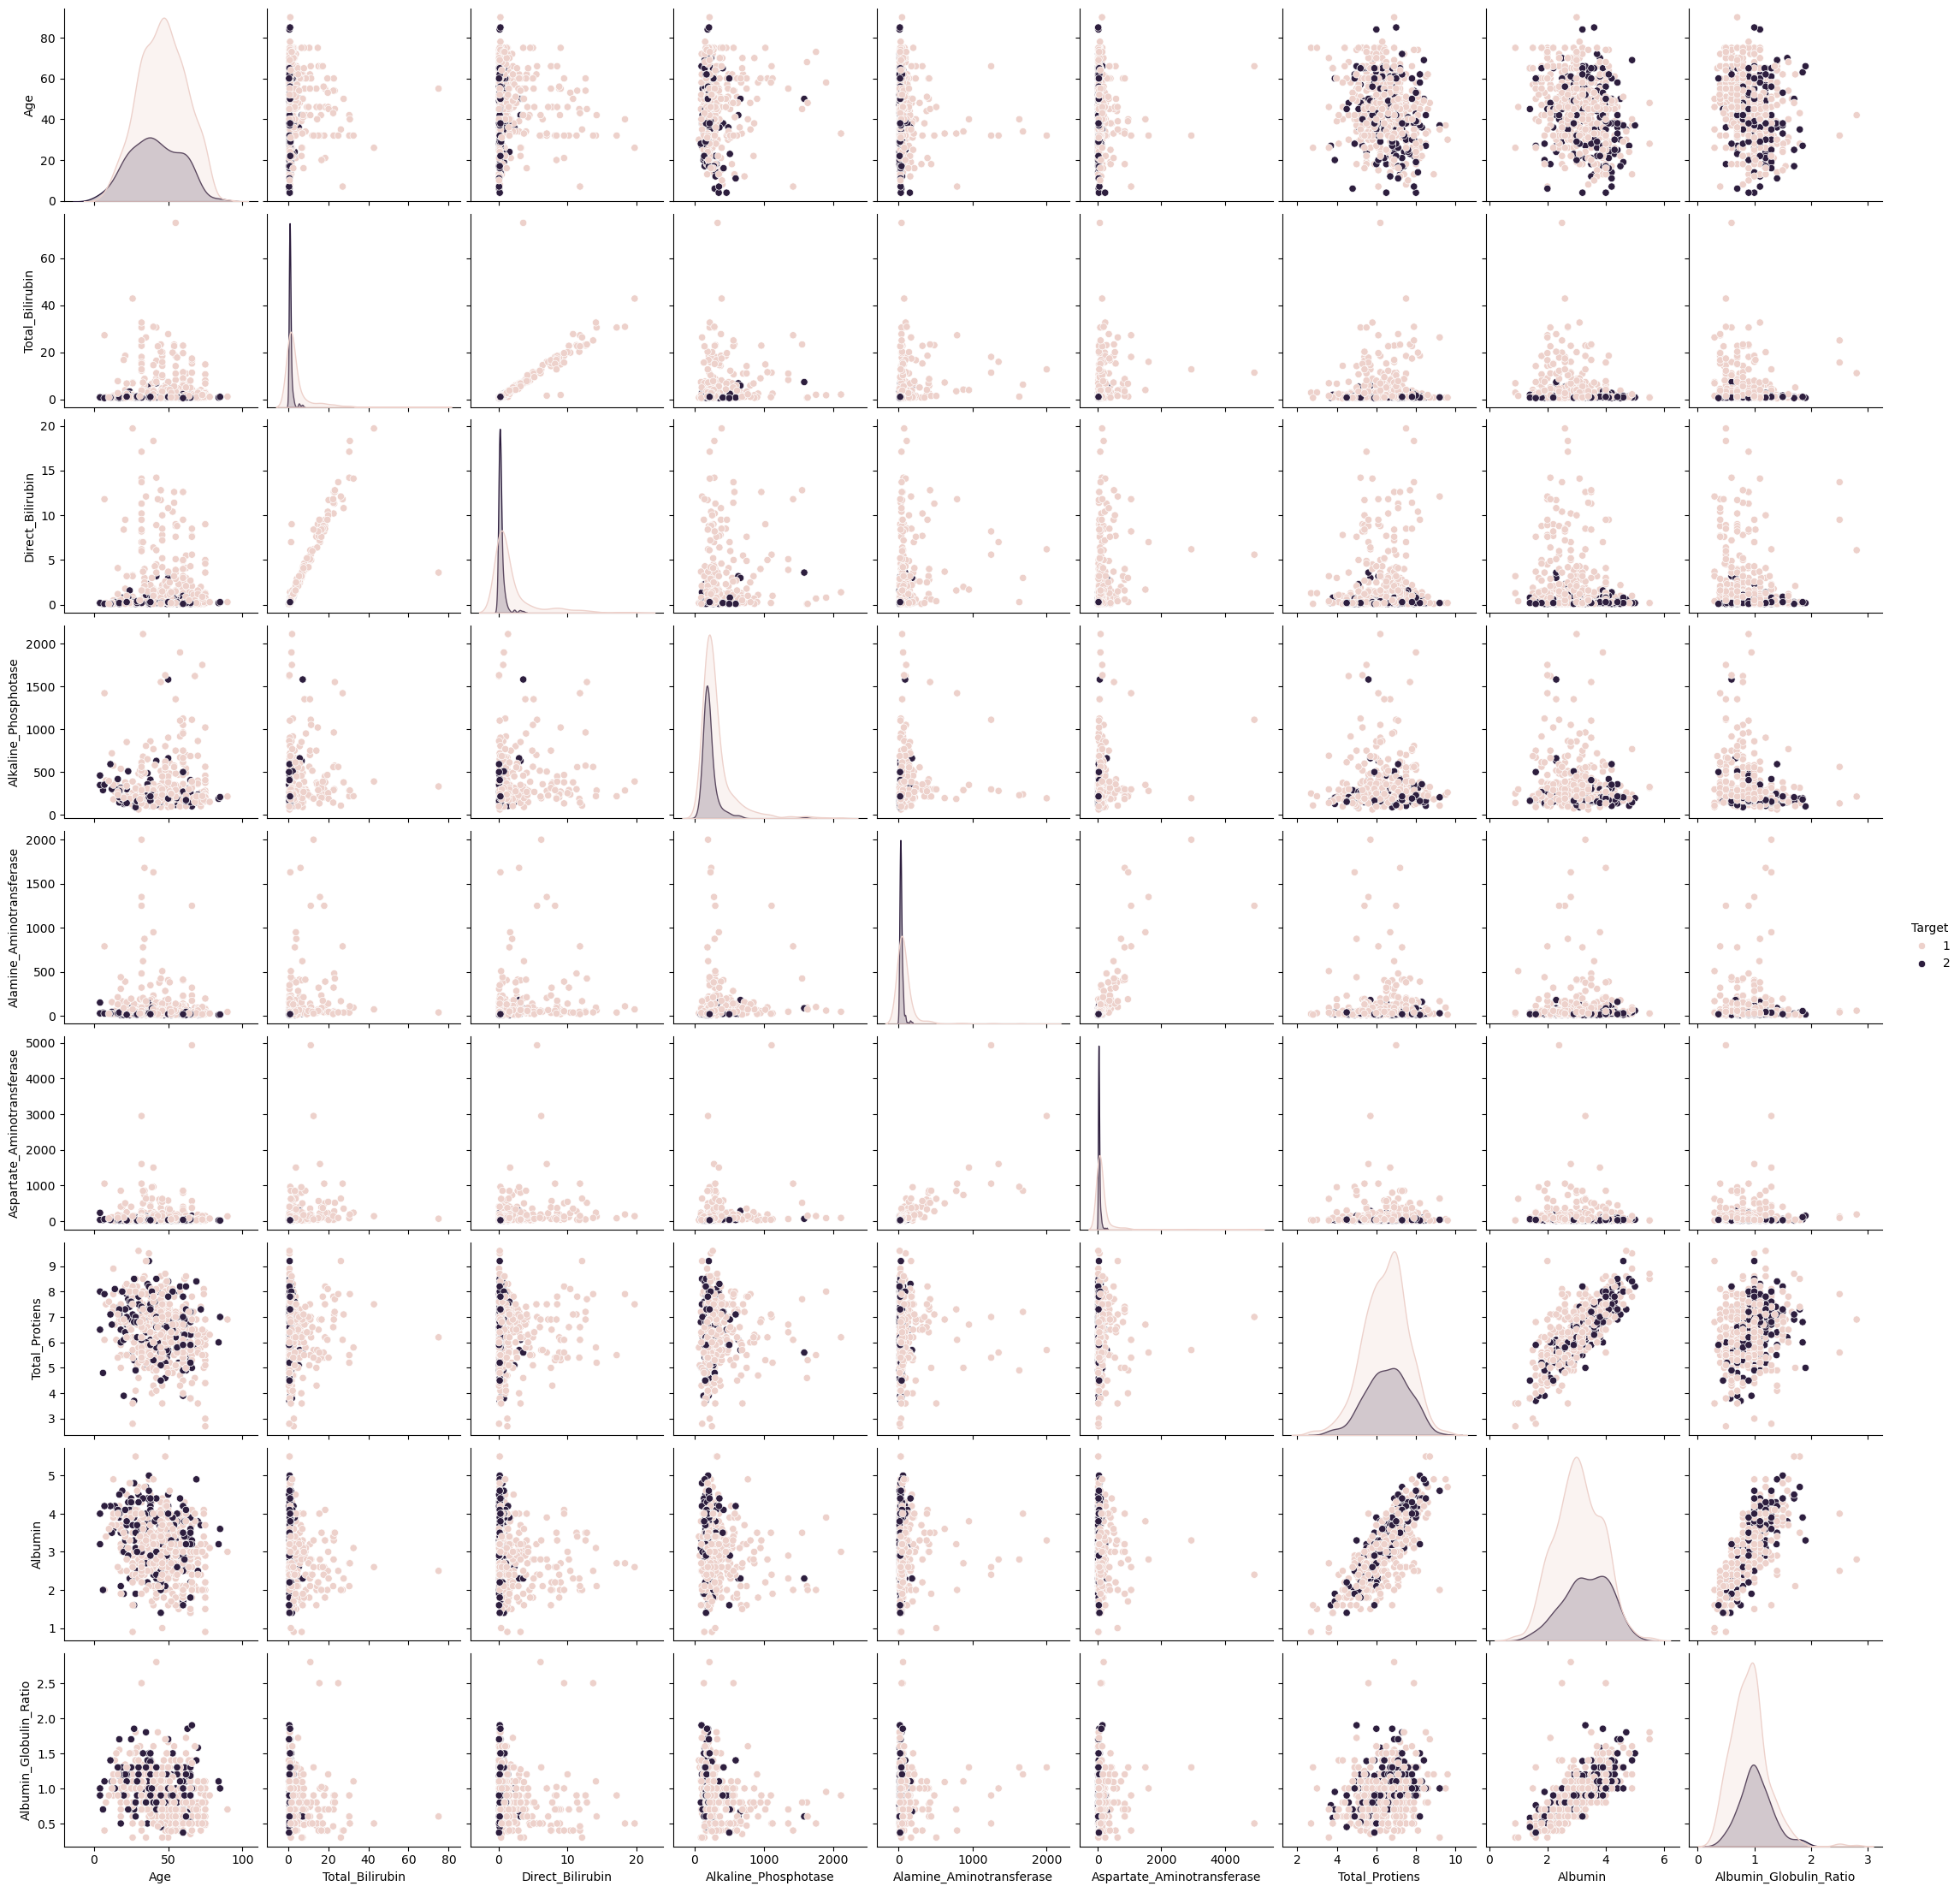

In [429]:
sns.pairplot(data, hue='Target')

In [430]:
# Total_bilirubin and Diract Bilirubin are highly correlated. so we need to remove any one of it.
#Alamine_Aminotransferase and	Aspartate_Aminotransferase are strongly correlated
# Albumin and Total_protiens are strongly correlated
# Albumin and Albumin_Globulin_Ratio are  correlated

## Data preprocessing

In [431]:
# Albumin_globulin ratio has null values. lets replace it with median
data.Albumin_Globulin_Ratio=data.Albumin_Globulin_Ratio.fillna(0.947064)

In [432]:
data.Albumin_Globulin_Ratio.isnull().sum()

0

In [433]:
data.Albumin_Globulin_Ratio

0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: Albumin_Globulin_Ratio, Length: 583, dtype: float64

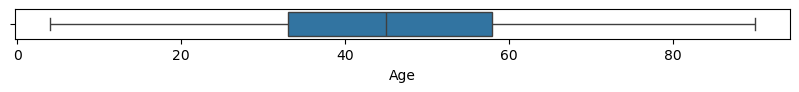

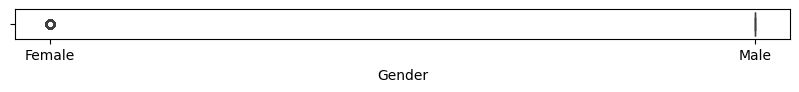

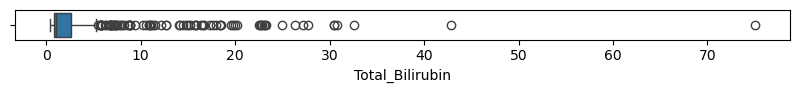

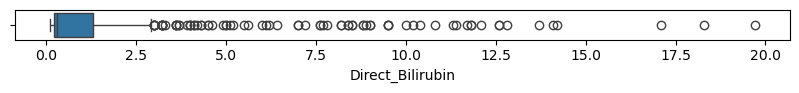

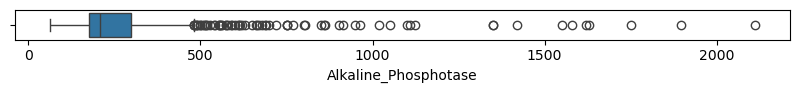

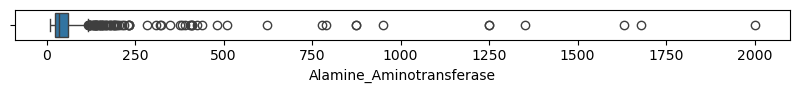

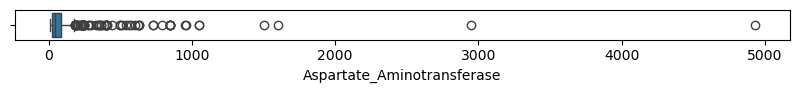

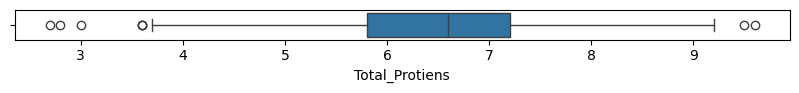

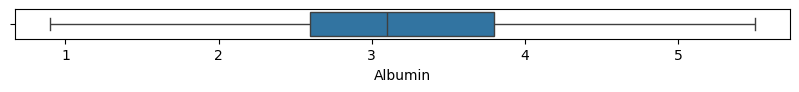

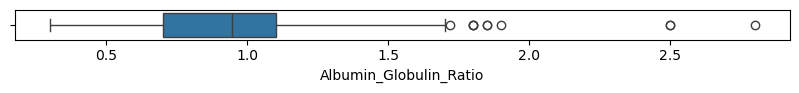

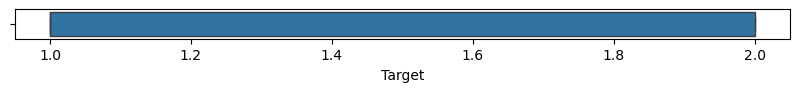

In [435]:

plotnum=1
for i in data.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(11,1,plotnum)
    sns.boxplot(x=data[i])
    plotnum+=1
    

In [436]:
data.Target.value_counts().sum()

583

In [437]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [438]:
d1=data.select_dtypes(exclude='object')

In [439]:
d1.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Target,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


<Axes: >

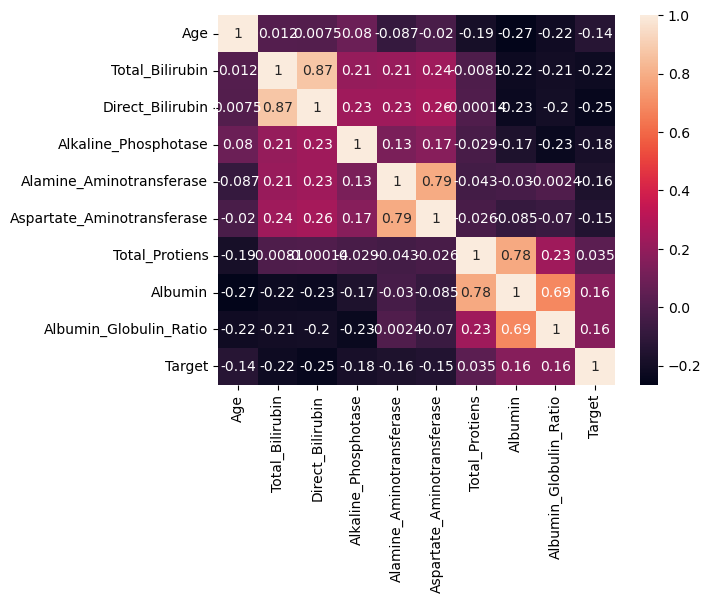

In [440]:
sns.heatmap(d1.corr(), annot=True)

In [441]:
# here total_bilirubin and direct_billirubin has very strong correlation. so we should drop any one of these.i am dropping Direct_bilirubin,since 
#Direct Bilirubin is a subset of Total_Bilirubin. 

#Total_proteins strongly correlated with Albumin.
# Albumin strongly correlated with total_proteins and albumin_globulin_ratio and total_proteins is less correlated with the target.
# so lets remove total_proteins
# Aspartate_Aminotransferase and Alamine_aminotransferase has strong correlation.Alanine aminotransferase (ALT) is generally considered 
#a more specific marker of liver disease than  aspartate aminotransferase (AST) so lets drop Aspartate_Aminotransferase .

In [442]:
data1= data.drop(['Direct_Bilirubin','Aspartate_Aminotransferase','Total_Protiens'], axis=1)

In [443]:
data1.Target

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Target, Length: 583, dtype: int64

In [452]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import *

# Applying OneHotEncoding to the 'Gender' column
preprocessor = ColumnTransformer(transformers=[
    ('gender_ohe', OneHotEncoder(), ['Gender']), 
        ('scaler', StandardScaler(), ['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 
                                    'Alamine_Aminotransferase',
                                    'Albumin','Albumin_Globulin_Ratio'])],
                                     remainder='passthrough')

In [453]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('gender_ohe', OneHotEncoder(), ['Gender']),
                                ('scaler', StandardScaler(),
                                 ['Age', 'Total_Bilirubin',
                                  'Alkaline_Phosphotase',
                                  'Alamine_Aminotransferase', 'Albumin',
                                  'Albumin_Globulin_Ratio'])])

In [454]:
import pickle
with open("pre-processor.pkl","wb") as file:
    pickle.dump(preprocessor,file)

In [455]:
data1.Target.value_counts()

Target
1    416
2    167
Name: count, dtype: int64

In [456]:
#Since the target variable y is imbalanced and this is a healthcare dataset, we will use SMOTE (Synthetic Minority Over-sampling Technique) here.
#SMOTE generates synthetic samples for the minority class instead of simply duplicating existing ones

In [457]:
x=data1.iloc[:,:-1]
y=data1.Target
y = y.replace({2: 0}) # here 0 will be minority class- non-liver disease patients.

In [458]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=10)

X_train = preprocessor.fit_transform(x_train)

In [459]:
# since y is imbalanced lets use over sampling technique(SMOTE) here on training data
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=30)
X_trainSmote, Y_trainSmote=smote.fit_resample(X_train,y_train)

In [460]:
Y_trainSmote.value_counts()

Target
0    333
1    333
Name: count, dtype: int64

# model creation

In [461]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_trainSmote, Y_trainSmote)

LogisticRegression()

In [462]:
X_test=preprocessor.fit_transform(x_test)

In [463]:
y_pred= lr.predict(X_test)

In [464]:
y_trainPred=lr.predict(X_trainSmote)

In [465]:
## getting classification report
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score, confusion_matrix

report=classification_report(y_test,y_pred)
print(report)
print(f"ROC_AUC_SCORE: {roc_auc_score(y_test,y_pred)})
print(confusion_matrix(y_test,y_pred))

0.6581196581196581
              precision    recall  f1-score   support

           0       0.44      0.65      0.52        34
           1       0.82      0.66      0.73        83

    accuracy                           0.66       117
   macro avg       0.63      0.65      0.63       117
weighted avg       0.71      0.66      0.67       117

0.6548547129695251
[[22 12]
 [28 55]]


In [ ]:
# here Logistic Regression model is able to predict 55  liver patients correctly and misclassifies 28 people as non-liver patients.
# f1 score for class 1 is 0.73
#Roc_auc_score is 0.6548, which is just ok.
# model was able to predict 22 out of 34 in class 2.

In [556]:
#SVC model
from sklearn.svm import SVC  # # assign Support vector classifier
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_trainSmote,Y_trainSmote) 

SVC()

In [467]:
y_pred=svclassifier.predict(X_test)

In [468]:
from sklearn.metrics import classification_report,accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.6581196581196581
              precision    recall  f1-score   support

           0       0.45      0.82      0.58        34
           1       0.89      0.59      0.71        83

    accuracy                           0.66       117
   macro avg       0.67      0.71      0.65       117
weighted avg       0.76      0.66      0.67       117

0.7069454287739192
[[28  6]
 [34 49]]


In [ ]:
# here svc model without tuning is not good in predicting class 1, since it is able to predict 49 people correctly in class 1. 
#it wrongly predicted 34 liver patients as non-liver patients.

In [469]:
from itertools import product  

param_grid_linear = {           
    'C': [0.01,0.1, 5, 10,50,60,65,70,80],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}
param_grid_rbf = {              
    'C': [0.01,0.1, 5, 10,50,60,65,70,80],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_poly = {             
    'C': [0.01,0.1, 5, 10,50,60,65,70,80],
    'kernel': ['poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4,5,6,7,8]
}

In [557]:
from sklearn.model_selection import GridSearchCV


model=SVC()

grid = GridSearchCV(model,param_grid=param_grid_poly, refit = True, verbose = 2,scoring='f1',cv=5)


grid.fit(X_trainSmote,Y_trainSmote)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=scal

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 5, 10, 50, 60, 65, 70, 80],
                         'degree': [2, 3, 4, 5, 6, 7, 8],
                         'gamma': ['scale', 'auto'], 'kernel': ['poly']},
             scoring='f1', verbose=2)

In [558]:
print(grid.best_params_)
y_hat=grid.predict(X_test)
svc_CR=classification_report(y_test,y_hat)
print(classification_report(y_test,y_hat))
svc_CM=confusion_matrix(y_test, y_hat)
print(confusion_matrix(y_test, y_hat))
svc_ROC=roc_auc_score(y_test,y_hat)
print(roc_auc_score(y_test,y_hat))

{'C': 65, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.48      0.68      0.56        34
           1       0.84      0.70      0.76        83

    accuracy                           0.69       117
   macro avg       0.66      0.69      0.66       117
weighted avg       0.74      0.69      0.70       117

[[23 11]
 [25 58]]
0.6876328844790929


In [ ]:
# in svc model with tuning the model has improved its performance. it is able to predict correctly more people in class 1. 
# out of 83 , it predicted 58 people correctly in class 1. and failed to predict 25 liver-patients. But anyway the model improved.
# f1 score for class 1 is 0.76
# roc-auc-score is .6876
# in class 2, out of 34 model correctly predicted 23.

In [472]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainSmote,Y_trainSmote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


In [473]:
error_rate

[0.42735042735042733,
 0.49572649572649574,
 0.4444444444444444,
 0.49572649572649574,
 0.49572649572649574,
 0.4700854700854701,
 0.42735042735042733,
 0.452991452991453,
 0.452991452991453,
 0.452991452991453]

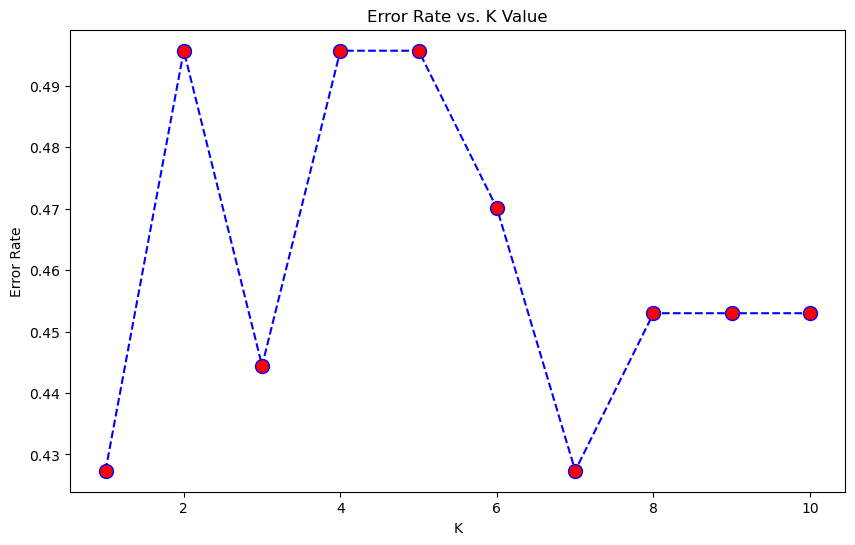

In [474]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [475]:
#let us choose higher value for k  to reduce overfitiing
knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_trainSmote,Y_trainSmote)

KNeighborsClassifier(n_neighbors=7)

In [476]:
y_trainPred=knn2.predict(X_trainSmote)
print(classification_report(y_trainPred,Y_trainSmote))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       430
           1       0.64      0.90      0.75       236

    accuracy                           0.78       666
   macro avg       0.78      0.81      0.78       666
weighted avg       0.82      0.78      0.79       666



In [477]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6581196581196581
              precision    recall  f1-score   support

           0       0.45      0.82      0.58        34
           1       0.89      0.59      0.71        83

    accuracy                           0.66       117
   macro avg       0.67      0.71      0.65       117
weighted avg       0.76      0.66      0.67       117

0.7069454287739192
[[28  6]
 [34 49]]


In [ ]:
# Knn model doesnt seems to be good in predicting class 1. out of 83 it was able to predict only 49 in class 1 and misclassified 34 liver patients.
 

In [478]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()             #object creation for decision tree
dt.fit(X_trainSmote,Y_trainSmote) 


DecisionTreeClassifier()

In [576]:
# checking classification report on training data

In [479]:
y_trainPred=dt.predict(X_trainSmote)
print(classification_report(y_trainPred,Y_trainSmote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       333

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666



In [480]:
y_predict=dt.predict(X_test)    # predicting the model

In [577]:
# on testing data

In [481]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.6581196581196581
              precision    recall  f1-score   support

           0       0.45      0.82      0.58        34
           1       0.89      0.59      0.71        83

    accuracy                           0.66       117
   macro avg       0.67      0.71      0.65       117
weighted avg       0.76      0.66      0.67       117

0.7069454287739192
[[28  6]
 [34 49]]


In [482]:
# Decision tree is overfitiing with out tuning

In [483]:
#using hyperparameter tuning to reduce overfitting
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 15))), #depth of tree range from 1 to 25
    "min_samples_split":[2,3,5,6,7,10,15],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 20
}


tree_clf = DecisionTreeClassifier()               
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=2)


In [484]:
tree_cv.fit(X_trainSmote,Y_trainSmote)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params})")   # printing  best parameters

Fitting 2 folds for each of 7448 candidates, totalling 14896 fits
Best paramters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'best'})


In [485]:
dt1=DecisionTreeClassifier(criterion= 'gini', max_depth=13, min_samples_leaf= 2, min_samples_split=3, splitter= 'best')

In [486]:
dt1.fit(X_trainSmote,Y_trainSmote)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=3)

In [487]:
y_trainPred=dt1.predict(X_trainSmote)
print(classification_report(y_trainPred,Y_trainSmote))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       349
           1       0.93      0.97      0.95       317

    accuracy                           0.95       666
   macro avg       0.95      0.95      0.95       666
weighted avg       0.95      0.95      0.95       666



In [488]:
y_predict=dt.predict(X_test) 

In [489]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6581196581196581
              precision    recall  f1-score   support

           0       0.45      0.82      0.58        34
           1       0.89      0.59      0.71        83

    accuracy                           0.66       117
   macro avg       0.67      0.71      0.65       117
weighted avg       0.76      0.66      0.67       117

0.7069454287739192
[[28  6]
 [34 49]]


In [ ]:
# in Decision tree , overfitting has been reduced with tuning, but still the model is not good in predicting class 1 compared
# to logistic Regression and SVC with tuning.

In [563]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier   # importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100,verbose=2,n_jobs=-1) #  RandomForest CLassifier into variable
rf_clf.fit(X_trainSmote,Y_trainSmote)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, verbose=2)

In [564]:
print(rf_clf)

RandomForestClassifier(n_jobs=-1, verbose=2)


In [578]:
# on training data

In [565]:
y_trainPred=rf_clf.predict(X_trainSmote)
print(classification_report(y_trainPred,Y_trainSmote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       333

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [566]:
y_pred=rf_clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [579]:
# on testing data

In [569]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
print(f"ROC-AUC-SCORE: {roc_auc_score(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

0.7008547008547008
              precision    recall  f1-score   support

           0       0.49      0.71      0.58        34
           1       0.85      0.70      0.77        83

    accuracy                           0.70       117
   macro avg       0.67      0.70      0.67       117
weighted avg       0.75      0.70      0.71       117

ROC-AUC-SCORE: 0.702338766832034
[[24 10]
 [25 58]]


In [495]:
# Random Forest is overfitting

In [496]:
#doing hyperparameter tuning to improve the model

In [570]:
n_estimators = [60,80,100]      # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt','log2']        # maximum number of features allowed to try in individual tree
max_depth = [2,3,4]            # List Comprehension-using for loop in list

min_samples_split = [5,10,15,20]          # minimum number of samples required to split an internal node
min_samples_leaf = [5,10,15,20]              # minimum number of samples required to be at a leaf node.

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=10)   # Loading the model

rf_cv = GridSearchCV(estimator=rf_clf1, scoring='f1',param_grid= random_grid, cv=2,
                               verbose=3, n_jobs=-1)


In [571]:
rf_cv.fit(X_trainSmote,Y_trainSmote)
rf_best_params = rf_cv.best_params_       # it will give you best parameters
print(f"Best paramters: {rf_best_params})")   # printing  best parameters

Fitting 2 folds for each of 432 candidates, totalling 864 fits
Best paramters: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100})


In [572]:
rf_clf2 = RandomForestClassifier(n_estimators=100,min_samples_leaf=5,min_samples_split=5,max_features="log2",max_depth=4)
rf_clf2.fit(X_trainSmote, Y_trainSmote)  # train with tune parameters

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=5,
                       min_samples_split=5)

In [580]:
# on training data

In [573]:
y_trainPred=rf_clf2.predict(X_trainSmote)
print(classification_report(y_trainPred,Y_trainSmote))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       386
           1       0.69      0.82      0.75       280

    accuracy                           0.77       666
   macro avg       0.77      0.78      0.77       666
weighted avg       0.78      0.77      0.77       666



In [581]:
# on testing data

In [574]:

rf_report=classification_report(y_test,y_pred)
print(rf_report)
rf_CM=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
rf_ROC=roc_auc_score(y_test,y_pred)
print(roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.71      0.58        34
           1       0.85      0.70      0.77        83

    accuracy                           0.70       117
   macro avg       0.67      0.70      0.67       117
weighted avg       0.75      0.70      0.71       117

[[24 10]
 [25 58]]
0.702338766832034


In [ ]:
# RANDOM FORSEST model is good in predicting class 1. As we can see out of 83, the model is able to predict 58 correctly in class1 and
# failed to predict only 25 liver patients.
# f1 score for class 1 is .76
# roc-auc score is .6876

#in class 2 out of 34 it correctly predicted 23.
# so far SVC with tuning and Random Forest with tuning is performing better.

In [502]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier  # Importing GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_trainSmote,Y_trainSmote)

GradientBoostingClassifier()

In [582]:
# on training data

In [503]:
y_trainPred=gbm.predict(X_trainSmote)
print(classification_report(y_trainPred,Y_trainSmote))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       353
           1       0.88      0.94      0.91       313

    accuracy                           0.91       666
   macro avg       0.91      0.91      0.91       666
weighted avg       0.91      0.91      0.91       666



In [504]:
y_pred= gbm.predict(X_test)

In [583]:
# on testing data

In [505]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6666666666666666
              precision    recall  f1-score   support

           0       0.45      0.74      0.56        34
           1       0.85      0.64      0.73        83

    accuracy                           0.67       117
   macro avg       0.65      0.69      0.65       117
weighted avg       0.74      0.67      0.68       117

0.6869241672572644
[[25  9]
 [30 53]]


In [ ]:
# Gradient Boost model is able to correctly predict 53 patients out of 83 in class 1.
# but this model is showing better prediction for class 2 compared to other models. out of 34 it is able to predict 25 correctly in class 2.
#f1-score for class 1 is .73
# roc-auc score is .68
# but since we have to give more imporatance for the liver patients here, we can choose SVC, and Random Forest over this model.

In [506]:
# hyperparameter tuning to improve the model

In [507]:
from sklearn.model_selection import GridSearchCV

# Define Parameters grid for learning_rate, max_depth, n_estimators
param_grid = {
    'learning_rate': [ 0.001,0.01],
    'max_depth': [4,5, 6],
    'n_estimators': [100,110,120,150,170,200],
    'min_samples_split':[8,10,12,16]
}
GB=GradientBoostingClassifier()  # Assigning GradientBoostingClassifier model into variables

rcv= GridSearchCV(estimator=GB, scoring='f1',refit = True,param_grid=param_grid, cv=2, 
                               verbose=3, n_jobs=-1)
rcv

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [4, 5, 6],
                         'min_samples_split': [8, 10, 12, 16],
                         'n_estimators': [100, 110, 120, 150, 170, 200]},
             scoring='f1', verbose=3)

In [508]:
rcv.fit(X_trainSmote,Y_trainSmote)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 

Fitting 2 folds for each of 144 candidates, totalling 288 fits


In [509]:
print(cv_best_params)

{'learning_rate': 0.01, 'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 200}


In [510]:
GB2=GradientBoostingClassifier(n_estimators=100, max_depth=6, learning_rate=0.01,min_samples_split= 12)
GB2.fit(X_trainSmote,Y_trainSmote)#training 

GradientBoostingClassifier(learning_rate=0.01, max_depth=6,
                           min_samples_split=12)

In [584]:
# on training data

In [511]:
y_trainPred=GB2.predict(X_trainSmote)
print(classification_report(y_trainPred,Y_trainSmote))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       377
           1       0.81      0.94      0.87       289

    accuracy                           0.88       666
   macro avg       0.88      0.89      0.88       666
weighted avg       0.89      0.88      0.88       666



In [585]:
# on testing data

In [512]:
y_predict=GB2.predict(X_test)#testing

In [513]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6666666666666666
              precision    recall  f1-score   support

           0       0.45      0.74      0.56        34
           1       0.85      0.64      0.73        83

    accuracy                           0.67       117
   macro avg       0.65      0.69      0.65       117
weighted avg       0.74      0.67      0.68       117

0.6869241672572644
[[25  9]
 [30 53]]


In [ ]:
# Gradient boost with tuning didnt show any improvement on the performance.

In [522]:
#XGBoost
from xgboost import XGBClassifier#installing model XGBOOST


In [523]:
# Create the XGBClassifier object with the necessary parameters
xgb_r = XGBClassifier(random_state=42)

# Fit the model using training data and specify the evaluation set for early stopping
xgb_r.fit(X_trainSmote, Y_trainSmote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [525]:
y_pred = xgb_r.predict(X_test)
y_trainPred=xgb_r.predict(X_trainSmote)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report for training dataset:")
print(classification_report(y_trainPred, Y_trainSmote))
print("\nClassification Report for test dataset:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[24 10]
 [28 55]]

Classification Report for training dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       333

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666


Classification Report for test dataset:
              precision    recall  f1-score   support

           0       0.46      0.71      0.56        34
           1       0.85      0.66      0.74        83

    accuracy                           0.68       117
   macro avg       0.65      0.68      0.65       117
weighted avg       0.73      0.68      0.69       117



In [ ]:
# Xgboost is overfitting

In [529]:

print(roc_auc_score(y_test,y_pred))

0.6842664776754075


In [ ]:
# hyperparameter tuning to improve the model

In [530]:
# Define parameters grid for gamma, learning_Rate, max_depth, n_estimator, reg_alpha, reg_lamdba
from xgboost import XGBClassifier
param_grid = {'gamma': [0.1,0.5],
              'learning_rate': [0.1,0.5,1],
              'max_depth': [2,3,4],
              'n_estimators': [50,65,80,100],
              'reg_alpha': [0,0.01,0.1,0.2,0.4],
              'reg_lambda': [10,20,100]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=2)  # Assigning XGBClassifier model into variables

rcv= GridSearchCV(estimator=XGB, scoring='roc_auc',refit=True,param_grid=param_grid,  cv=2, 
                               verbose=2, n_jobs=-1)
rcv

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.5], 'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 65, 80, 100],
                         'reg_alpha': [0, 0.01, 0.1, 0.2, 0.4],
                         'reg_lambda': [10, 20, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
rcv.fit(X_trainSmote, Y_trainSmote)
       

In [ ]:
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params}")

In [ ]:
best_model = rcv.best_estimator_

In [531]:
XGB2=XGBClassifier( reg_lambda=10, n_estimators=65, max_depth=
                   3, learning_rate=0.5,reg_alpha=0.1
                   , gamma=0.1)
XGB2.fit(X_trainSmote, Y_trainSmote)
y_predict=XGB2.predict(X_test)#testing

In [532]:
Y_trainSmote.unique()

array([0, 1], dtype=int64)

In [586]:
# on training dataset

In [533]:
y_trainPred=XGB2.predict(X_trainSmote)
print(classification_report(y_trainPred,Y_trainSmote))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       343
           1       0.93      0.96      0.94       323

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666



In [587]:
# on tetsing data

In [535]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6752136752136753
              precision    recall  f1-score   support

           0       0.46      0.71      0.56        34
           1       0.85      0.66      0.74        83

    accuracy                           0.68       117
   macro avg       0.65      0.68      0.65       117
weighted avg       0.73      0.68      0.69       117

0.6842664776754075
[[24 10]
 [28 55]]


In [ ]:
# here in XGBOOST , model is able to predict 55 liver patients correctly out of 83.
# and in class 2 model correctly predicted 24 out of 34.
# roc-auc-score is .68 
# f1 score for class 1 is .74
#XGBoost is also working good.

In [551]:
#using ANN
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(60,20),activation="relu",solver="adam",learning_rate_init=0.01,alpha=0.1,
                      max_iter=500,n_iter_no_change=100,
                       random_state=10,verbose=True,batch_size=100)
model.fit(X_trainSmote, Y_trainSmote)

Iteration 1, loss = 0.67184005
Iteration 2, loss = 0.59817337
Iteration 3, loss = 0.57281699
Iteration 4, loss = 0.55818258
Iteration 5, loss = 0.54911322
Iteration 6, loss = 0.54750184
Iteration 7, loss = 0.53375080
Iteration 8, loss = 0.53416221
Iteration 9, loss = 0.52624556
Iteration 10, loss = 0.51862872
Iteration 11, loss = 0.51209731
Iteration 12, loss = 0.50737878
Iteration 13, loss = 0.50907148
Iteration 14, loss = 0.50209946
Iteration 15, loss = 0.49722433
Iteration 16, loss = 0.50332748
Iteration 17, loss = 0.49451752
Iteration 18, loss = 0.50269885
Iteration 19, loss = 0.49556299
Iteration 20, loss = 0.47895755
Iteration 21, loss = 0.47704720
Iteration 22, loss = 0.46943472
Iteration 23, loss = 0.46705660
Iteration 24, loss = 0.45933566
Iteration 25, loss = 0.44955761
Iteration 26, loss = 0.44273156
Iteration 27, loss = 0.44617564
Iteration 28, loss = 0.43979576
Iteration 29, loss = 0.43146099
Iteration 30, loss = 0.43471335
Iteration 31, loss = 0.44959221
Iteration 32, los

C:\Users\new\anaconda3_2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, batch_size=100, hidden_layer_sizes=(60, 20),
              learning_rate_init=0.01, max_iter=500, n_iter_no_change=100,
              random_state=10, verbose=True)

In [549]:
y_trainPred=gbm.predict(X_trainSmote)
print("classification report for training data: ")
print(classification_report(y_trainPred,Y_trainSmote))

classification report for training data: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       353
           1       0.88      0.94      0.91       313

    accuracy                           0.91       666
   macro avg       0.91      0.91      0.91       666
weighted avg       0.91      0.91      0.91       666



In [552]:
report=classification_report(y_test,y_pred)
print("classification report for testing data: ")
print(report)
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

classification report for testing data: 
              precision    recall  f1-score   support

           0       0.46      0.71      0.56        34
           1       0.85      0.66      0.74        83

    accuracy                           0.68       117
   macro avg       0.65      0.68      0.65       117
weighted avg       0.73      0.68      0.69       117

0.6842664776754075
[[24 10]
 [28 55]]


In [ ]:
# here using ANN the model worked as same like XGboost. it is able to predict class 1. out of 83 liver patients, the model correctly predicted 55.
# f1 score for class 1 is .74
# in class 2 non-liver patients, out of 34 model predicted 24 correctly.
# roc-auc-score is .68

#### After creating and evaluating all the models, the ones that perform best at predicting class 1 compared to the others are SVC and Random Forest. Their performance evaluation is provided below:

In [575]:
print(" for SVC model with hyperparameter tuning:  ")
print(svc_CR)
print(svc_CM)
print(f" ROC_AUC_SCORE  : {svc_ROC}")
print("****************************************************************************")
print(" for Random Forest model with hyperparameter tuning : ")
print(rf_report)
print(rf_CM)
print(f" ROC_AUC_SCORE  : {rf_ROC}")

 for SVC model with hyperparameter tuning:  
              precision    recall  f1-score   support

           0       0.48      0.68      0.56        34
           1       0.84      0.70      0.76        83

    accuracy                           0.69       117
   macro avg       0.66      0.69      0.66       117
weighted avg       0.74      0.69      0.70       117

[[23 11]
 [25 58]]
 ROC_AUC_SCORE  : 0.6876328844790929
****************************************************************************
 for Random Forest model with hyperparameter tuning : 
              precision    recall  f1-score   support

           0       0.49      0.71      0.58        34
           1       0.85      0.70      0.77        83

    accuracy                           0.70       117
   macro avg       0.67      0.70      0.67       117
weighted avg       0.75      0.70      0.71       117

[[24 10]
 [25 58]]
 ROC_AUC_SCORE  : 0.702338766832034


#### The ROC-AUC score and F1-score are higher for the Random Forest model. The recall for class 1 is 0.77, with a precision of 0.85. Even for class 2 (the minority class, labeled as class 0), the recall is relatively high at 0.71, indicating fewer false negatives. This shows that the Random Forest model is performing better on the liver patient dataset, making it the best-performing model for this task.

## Challenges faced in this project:
## -----------------------------------
#### * Imbalanced dataset:
#####           The dataset was highly imbalanced, with a majority of patients having liver disease (class 1) and a minority of patients not having the disease (class 2).To address this imbalance, we applied balancing techniques such as oversampling the minority class to improve the model's ability to predict both classes accurately.

#### * Feature Scaling:
#####           The features had varying ranges, which could affect the performance of distance-based models. We used StandardScaler to normalize the features, ensuring that all features contributed equally to the model’s predictions.:

#### * Overfitting:
#####           The model tended to overfit on the training data, particularly when using tree classifiers leading to poor generalization on the test data. so we applied tuning hyperparameters to control the model complexity and reduce overfitting.

#### * Feature Selection:
#####           Identifying the most important features that contribute to predicting liver disease was crucial but challenging. We performed exploratory data analysis (EDA)n heatmap and correlation matrix to ensure that the right features were used in the model.

#### * Choosing the Right Model:
#####           Selecting a model that could handle the imbalanced data and perform well across both classes required extensive experimentation. We tested several classification algorithms including distance-based algorithms and tree based algorithms and found out Random Forest gave the best result for this dataset.